In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
from faker import Faker
import random
import pandas as pd
import numpy as np

# Initialize Faker
fake = Faker()

# Define possible values for categorical features
property_types = ["Apartment", "House", "Condo", "Townhouse"]
heating_cooling_types = ["Central", "Electric", "Gas", "None"]
furnished_statuses = ["Furnished", "Unfurnished", "Semi-Furnished"]
cities = ["New York", "Los Angeles", "Chicago", "Houston", "Miami"]
neighborhoods = {
    "New York": ["Manhattan", "Brooklyn", "Queens"],
    "Los Angeles": ["Beverly Hills", "Hollywood", "Downtown"],
    "Chicago": ["Lincoln Park", "Hyde Park", "The Loop"],
    "Houston": ["Midtown", "Uptown", "Downtown"],
    "Miami": ["South Beach", "Downtown", "Coral Gables"],
}

# Generate fake data
num_samples = 1000
data = []

for _ in range(num_samples):
    city = random.choice(cities)
    neighborhood = random.choice(neighborhoods[city])
    zipcode = fake.zipcode()

    price = round(random.uniform(50000, 2000000), 2)
    square_footage = random.randint(500, 5000)
    bedrooms = random.randint(1, 7)
    bathrooms = random.randint(1, 5)
    year_built = random.randint(1900, 2023)
    lot_size = round(random.uniform(0.05, 5), 2)
    property_tax = round(price * random.uniform(0.005, 0.02), 2)

    property_type = random.choice(property_types)
    heating_cooling = random.choice(heating_cooling_types)
    furnished = random.choice(furnished_statuses)

    listing_date = fake.date_between(start_date="-5y", end_date="today")
    sale_date = fake.date_between(start_date=listing_date, end_date="today")

    data.append([price, square_footage, bedrooms, bathrooms, year_built, lot_size, property_tax,
                 property_type, city, neighborhood, zipcode, heating_cooling, furnished, listing_date, sale_date])

# Create DataFrame
columns = ["Price", "Square Footage", "Bedrooms", "Bathrooms", "Year Built", "Lot Size", "Property Tax",
           "Property Type", "City", "Neighborhood", "Zipcode", "Heating/Cooling", "Furnished", "Listing Date", "Sale Date"]
df = pd.DataFrame(data, columns=columns)

# Display first few rows
df.head()


,Price,Square Footage,Bedrooms,Bathrooms,Year Built,Lot Size,Property Tax,Property Type,City,Neighborhood,Zipcode,Heating/Cooling,Furnished,Listing Date,Sale Date
0,1643971.50,1839,7,5,1990,0.77,22841.70,Apartment,New York,Queens,05859,Electric,Furnished,2022-09-20,2024-01-29
1,370411.46,4180,1,4,1976,2.98,5482.76,House,Houston,Uptown,53707,Central,Unfurnished,2020-09-11,2024-05-01
2,1458511.69,1155,7,3,2003,2.71,14496.80,Condo,Chicago,The Loop,84354,Gas,Furnished,2022-04-01,2023-01-22
3,669155.07,1144,2,1,1933,0.14,13052.44,Condo,New York,Queens,47235,Electric,Unfurnished,2022-03-30,2024-10-19
4,1823141.88,2088,6,5,2011,2.73,31183.58,House,Miami,South Beach,37855,Electric,Semi-Furnished,2025-01-10,2025-03-31


In [3]:
# Check the first few rows
print(df.head())


        Price  Square Footage  Bedrooms  Bathrooms  Year Built  Lot Size  \
0  1643971.50            1839         7          5        1990      0.77   
1   370411.46            4180         1          4        1976      2.98   
2  1458511.69            1155         7          3        2003      2.71   
3   669155.07            1144         2          1        1933      0.14   
4  1823141.88            2088         6          5        2011      2.73   

   Property Tax Property Type      City Neighborhood Zipcode Heating/Cooling  \
0      22841.70     Apartment  New York       Queens   05859        Electric   
1       5482.76         House   Houston       Uptown   53707         Central   
2      14496.80         Condo   Chicago     The Loop   84354             Gas   
3      13052.44         Condo  New York       Queens   47235        Electric   
4      31183.58         House     Miami  South Beach   37855        Electric   

        Furnished Listing Date   Sale Date  
0       Furnished

In [4]:
# Check data types and missing values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Price            1000 non-null   float64
 1   Square Footage   1000 non-null   int64  
 2   Bedrooms         1000 non-null   int64  
 3   Bathrooms        1000 non-null   int64  
 4   Year Built       1000 non-null   int64  
 5   Lot Size         1000 non-null   float64
 6   Property Tax     1000 non-null   float64
 7   Property Type    1000 non-null   object 
 8   City             1000 non-null   object 
 9   Neighborhood     1000 non-null   object 
 10  Zipcode          1000 non-null   object 
 11  Heating/Cooling  1000 non-null   object 
 12  Furnished        1000 non-null   object 
 13  Listing Date     1000 non-null   object 
 14  Sale Date        1000 non-null   object 
dtypes: float64(3), int64(4), object(8)
memory usage: 117.3+ KB
None


In [5]:
# Summary statistics for numerical columns
print(df.describe())

              Price  Square Footage     Bedrooms    Bathrooms   Year Built  \
count  1.000000e+03     1000.000000  1000.000000  1000.000000  1000.000000   
mean   1.030258e+06     2754.114000     4.045000     2.994000  1960.945000   
std    5.627437e+05     1313.391134     1.961842     1.411367    35.459432   
min    5.195684e+04      502.000000     1.000000     1.000000  1900.000000   
25%    5.608762e+05     1613.750000     2.000000     2.000000  1929.000000   
50%    1.000741e+06     2725.500000     4.000000     3.000000  1960.500000   
75%    1.530142e+06     3878.750000     6.000000     4.000000  1992.000000   
max    1.999450e+06     4996.000000     7.000000     5.000000  2023.000000   

         Lot Size  Property Tax  
count  1000.00000   1000.000000  
mean      2.53231  12736.525190  
std       1.43314   8677.697398  
min       0.06000    429.800000  
25%       1.29000   5888.970000  
50%       2.57000  10951.610000  
75%       3.75250  18385.310000  
max       5.00000  39251.

In [6]:
# Check missing values
print(df.isnull().sum())



Price              0
Square Footage     0
Bedrooms           0
Bathrooms          0
Year Built         0
Lot Size           0
Property Tax       0
Property Type      0
City               0
Neighborhood       0
Zipcode            0
Heating/Cooling    0
Furnished          0
Listing Date       0
Sale Date          0
dtype: int64


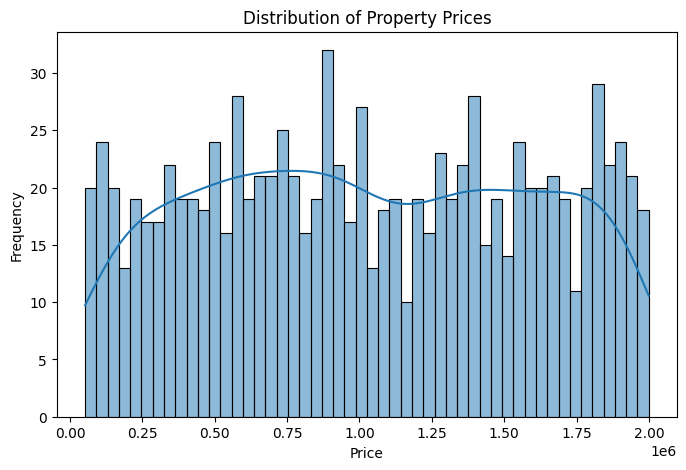

In [7]:
plt.figure(figsize=(8,5))
sns.histplot(df["Price"], bins=50, kde=True)
plt.title("Distribution of Property Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()


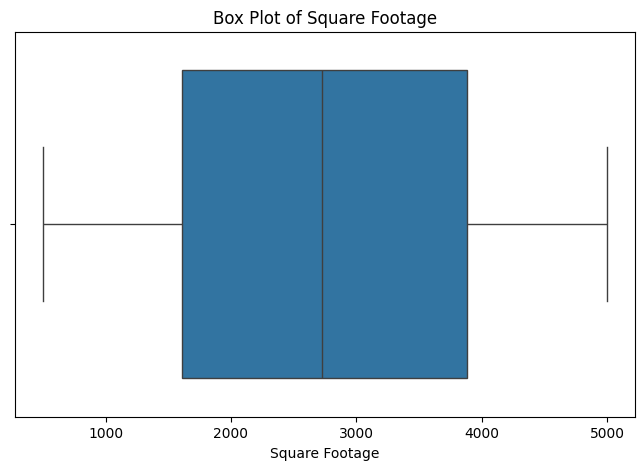

In [8]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df["Square Footage"])
plt.title("Box Plot of Square Footage")
plt.show()


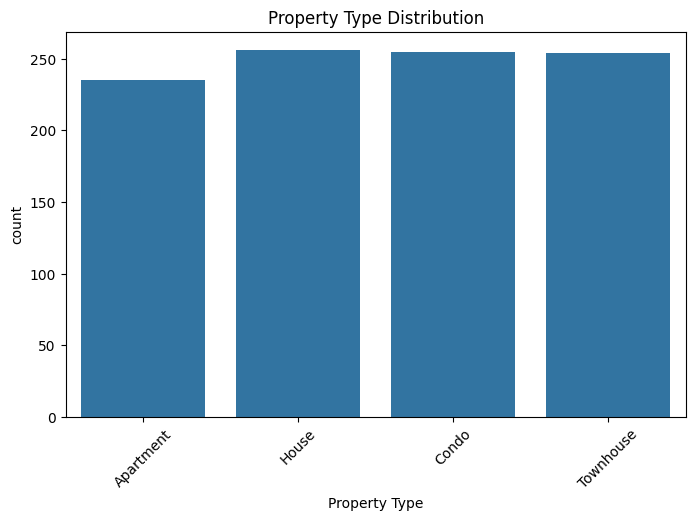

In [9]:
plt.figure(figsize=(8,5))
sns.countplot(x=df["Property Type"])
plt.title("Property Type Distribution")
plt.xticks(rotation=45)
plt.show()

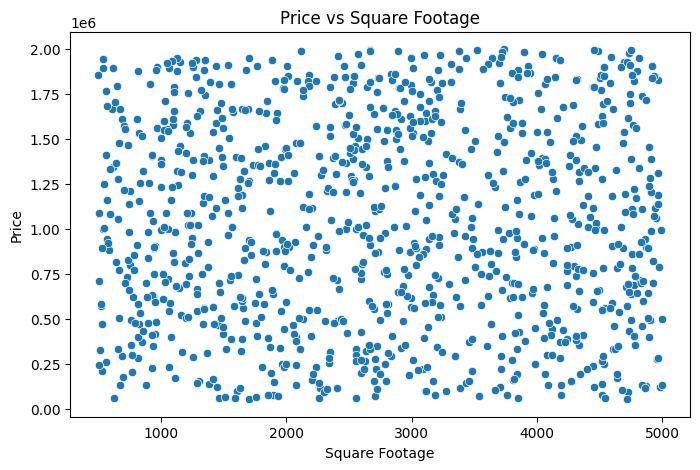

In [10]:
#Price vs. Square Footage
plt.figure(figsize=(8,5))
sns.scatterplot(x=df["Square Footage"], y=df["Price"])
plt.title("Price vs Square Footage")
plt.xlabel("Square Footage")
plt.ylabel("Price")
plt.show()

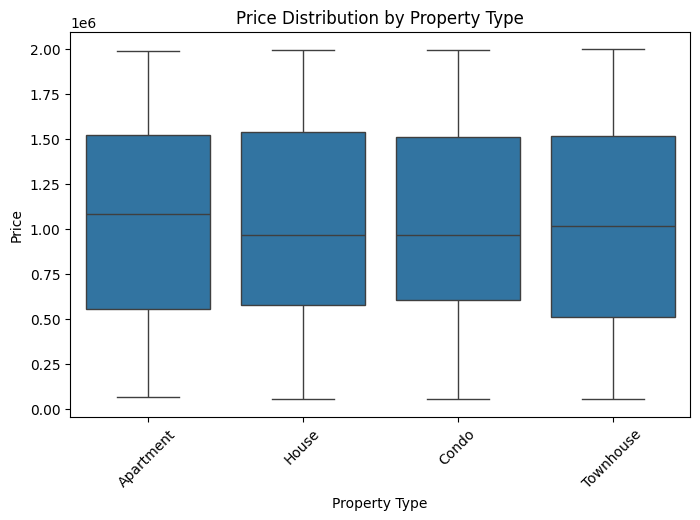

In [11]:
#Price by Property Type

plt.figure(figsize=(8,5))
sns.boxplot(x=df["Property Type"], y=df["Price"])
plt.title("Price Distribution by Property Type")
plt.xticks(rotation=45)
plt.show()

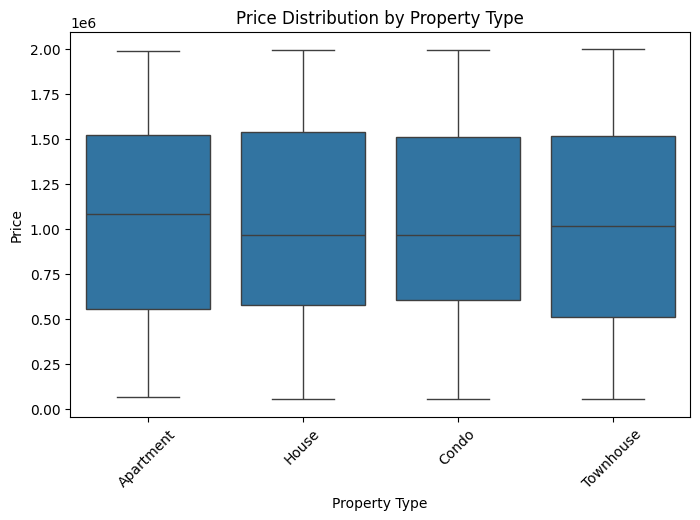

In [12]:
#Price by Property Type

plt.figure(figsize=(8,5))
sns.boxplot(x=df["Property Type"], y=df["Price"])
plt.title("Price Distribution by Property Type")
plt.xticks(rotation=45)
plt.show()

In [13]:
#1. Average Property Price
avg_price = df["Price"].mean()
print(f"Average Property Price: ${avg_price:,.2f}")

Average Property Price: $1,030,258.31


In [14]:
#Most Expensive and Cheapest Properties
max_price = df[df["Price"] == df["Price"].max()]
min_price = df[df["Price"] == df["Price"].min()]
print(f"Most Expensive Property:\n{max_price}\n")
print(f"Cheapest Property:\n{min_price}\n")

Most Expensive Property:
          Price  Square Footage  Bedrooms  Bathrooms  Year Built  Lot Size  \
303  1999450.09            3734         3          2        1982      0.77   

     Property Tax Property Type     City Neighborhood Zipcode Heating/Cooling  \
303      25830.27     Townhouse  Chicago    Hyde Park   23224        Electric   

     Furnished Listing Date   Sale Date  
303  Furnished   2023-07-17  2024-03-29  

Cheapest Property:
        Price  Square Footage  Bedrooms  Bathrooms  Year Built  Lot Size  \
105  51956.84            1707         7          1        1915      4.48   

     Property Tax Property Type   City Neighborhood Zipcode Heating/Cooling  \
105        432.06         Condo  Miami  South Beach   33757        Electric   

       Furnished Listing Date   Sale Date  
105  Unfurnished   2021-02-01  2021-06-09  



In [15]:
# Top 5 Most Common Property Types
property_type_counts = df["Property Type"].value_counts().head(5)
print("Top 5 Most Common Property Types:\n", property_type_counts)

Top 5 Most Common Property Types:
 Property Type
House        256
Condo        255
Townhouse    254
Apartment    235
Name: count, dtype: int64


In [16]:
#City with Highest Average Price
city_avg_price = df.groupby("City")["Price"].mean().sort_values(ascending=False)
print("City with Highest Average Price:\n", city_avg_price.head(1))


City with Highest Average Price:
 City
Los Angeles    1.059077e+06
Name: Price, dtype: float64


In [17]:
most_listings_city = df["City"].value_counts().idxmax()
print(f"City with the Most Listings: {most_listings_city}")

City with the Most Listings: Chicago


In [18]:
df["Price per SqFt"] = df["Price"] / df["Square Footage"]
avg_price_per_sqft = df["Price per SqFt"].mean()
print(f"Average Price per SqFt: ${avg_price_per_sqft:,.2f}")


Average Price per SqFt: $525.35


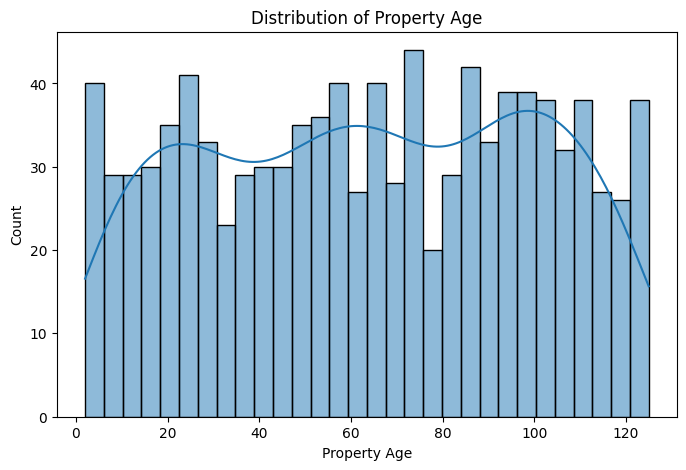

In [19]:
df["Property Age"] = 2025 - df["Year Built"]
plt.figure(figsize=(8,5))
sns.histplot(df["Property Age"], bins=30, kde=True)
plt.title("Distribution of Property Age")
plt.show()


In [20]:
common_hvac = df["Heating/Cooling"].mode()[0]
print(f"Most Common Heating/Cooling Type: {common_hvac}")


Most Common Heating/Cooling Type: Gas


In [21]:
common_neighborhood = df["Neighborhood"].mode()[0]
print(f"Most Common Neighborhood: {common_neighborhood}")


Most Common Neighborhood: Downtown


In [22]:
common_neighborhood = df["Neighborhood"].mode()[0]
print(f"Most Common Neighborhood: {common_neighborhood}")

Most Common Neighborhood: Downtown


In [23]:
avg_price_by_type = df.groupby("Property Type")["Price"].mean()
print("Average Price by Property Type:\n", avg_price_by_type)


Average Price by Property Type:
 Property Type
Apartment    1.034175e+06
Condo        1.031375e+06
House        1.033714e+06
Townhouse    1.022031e+06
Name: Price, dtype: float64


In [24]:
avg_tax_by_city = df.groupby("City")["Property Tax"].mean()
print("Average Property Tax by City:\n", avg_tax_by_city)


Average Property Tax by City:
 City
Chicago        12909.307358
Houston        12630.831257
Los Angeles    13176.479336
Miami          12244.017784
New York       12663.666600
Name: Property Tax, dtype: float64


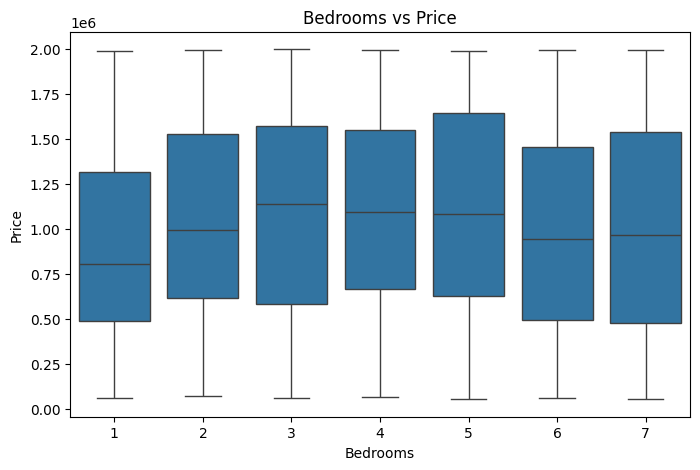

In [25]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df["Bedrooms"], y=df["Price"])
plt.title("Bedrooms vs Price")
plt.show()

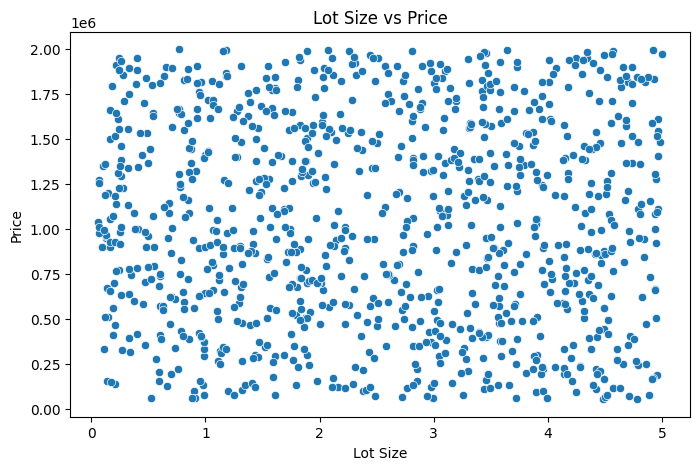

In [26]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df["Lot Size"], y=df["Price"])
plt.title("Lot Size vs Price")
plt.show()


In [27]:
furnished_avg = df.groupby("Furnished")["Price"].mean()
print("Average Price by Furnishing Status:\n", furnished_avg)

Average Price by Furnishing Status:
 Furnished
Furnished         1.017709e+06
Semi-Furnished    1.050823e+06
Unfurnished       1.020501e+06
Name: Price, dtype: float64


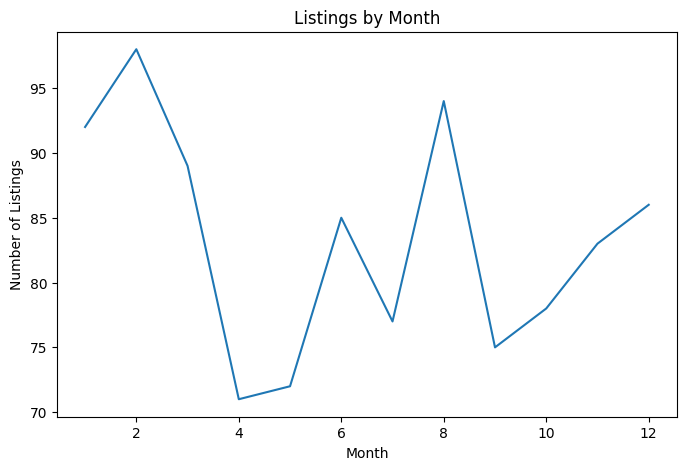

In [28]:
df["Listing Date"] = pd.to_datetime(df["Listing Date"])
df["Month"] = df["Listing Date"].dt.month
monthly_listings = df["Month"].value_counts().sort_index()

plt.figure(figsize=(8,5))
sns.lineplot(x=monthly_listings.index, y=monthly_listings.values)
plt.title("Listings by Month")
plt.xlabel("Month")
plt.ylabel("Number of Listings")
plt.show()


In [29]:
df["Sale Date"] = pd.to_datetime(df["Sale Date"])
df["Days on Market"] = (df["Sale Date"] - df["Listing Date"]).dt.days

avg_days_on_market = df["Days on Market"].mean()
print(f"Average Time to Sell a Property: {avg_days_on_market:.2f} days")


Average Time to Sell a Property: 448.52 days


In [30]:
expensive_neighborhoods = df.groupby("Neighborhood")["Price"].mean().sort_values(ascending=False)
print("Top 5 Most Expensive Neighborhoods:\n", expensive_neighborhoods.head(5))


Top 5 Most Expensive Neighborhoods:
 Neighborhood
Queens           1.106562e+06
Lincoln Park     1.093897e+06
Beverly Hills    1.069536e+06
Downtown         1.063918e+06
The Loop         1.058300e+06
Name: Price, dtype: float64


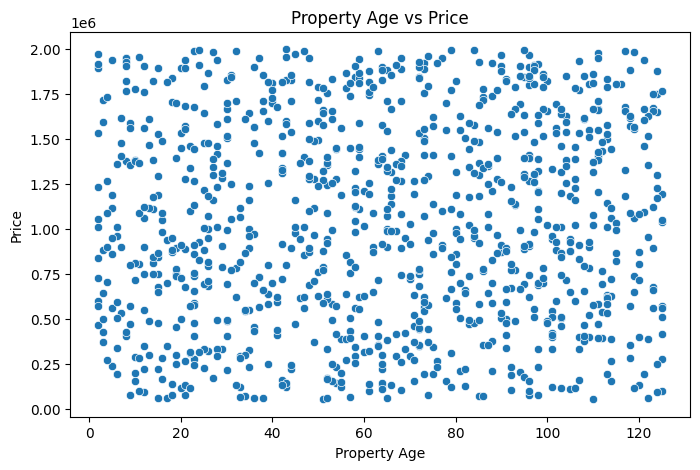

In [31]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df["Property Age"], y=df["Price"])
plt.title("Property Age vs Price")
plt.show()


In [32]:
fastest_selling_city = df.groupby("City")["Days on Market"].mean().sort_values()
print("City with the Fastest Selling Properties:\n", fastest_selling_city.head(1))


City with the Fastest Selling Properties:
 City
Chicago    381.575472
Name: Days on Market, dtype: float64


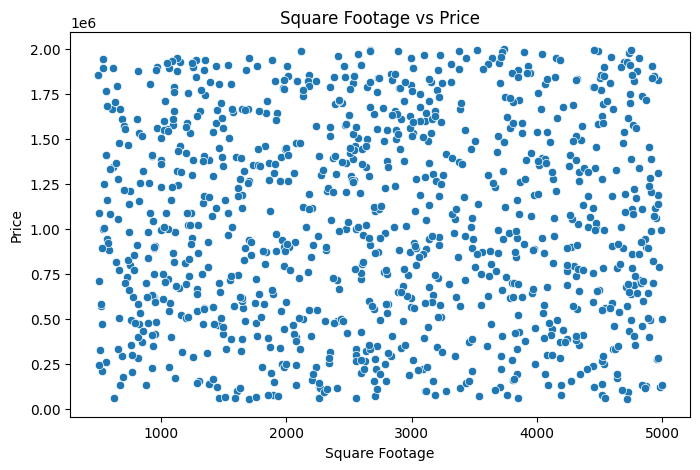

In [33]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df["Square Footage"], y=df["Price"])
plt.title("Square Footage vs Price")
plt.show()
